In [1]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

## 1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

In [6]:
def f(x: float) -> float:
    return (x-2)**2 + 1

def fp(x: float) -> float:
    return 2*(x-2)
xs = np.linspace(0,5,100)
#plt.plot(xs, f(xs), 'r')
#plt.grid()

2) If we start at $x=4$, which way should we move and why?

1.7999999999999998

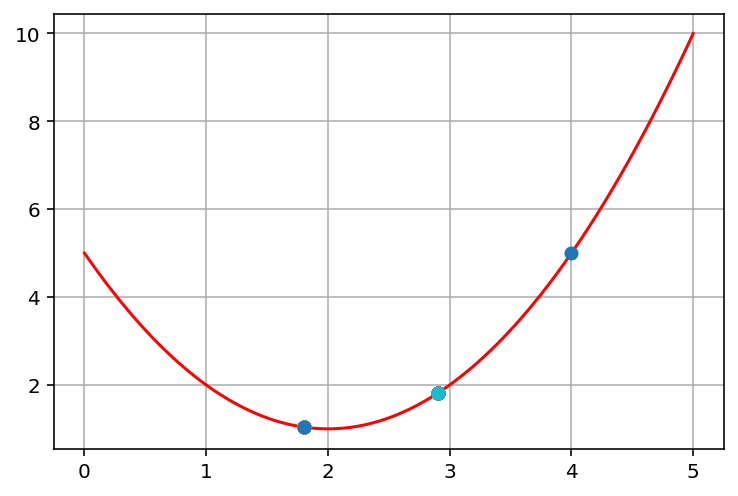

In [12]:
plt.plot(xs, f(xs), 'r')
plt.grid()

def grad_desc_fixed_step(f, fp, x0: float, step_size: float, n: int):
    x = x0
    plt.plot(x, f(x), 'o')
    for _ in range(n):
        x =  x - fp(x)/abs(fp(x)) * step_size
        plt.plot(x, f(x), 'o')
        #print(x)
    return x

grad_desc_fixed_step(f, fp, x0=4, step_size=1.1, n=50)

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

3.0000000000000213

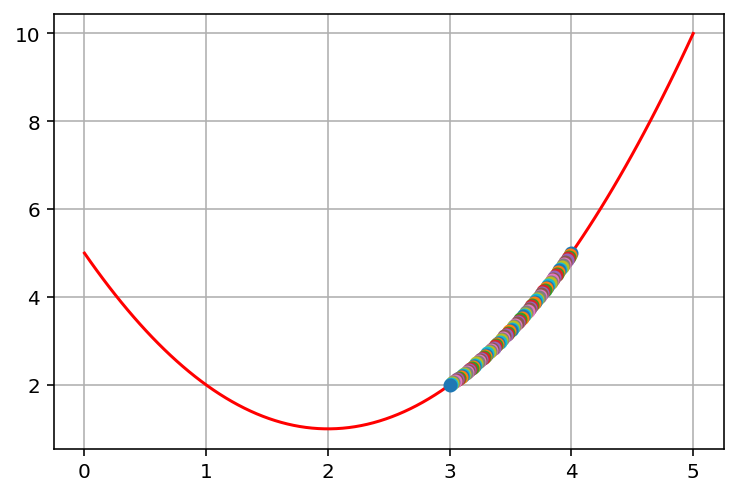

In [13]:
plt.plot(xs, f(xs), 'r')
plt.grid()

def grad_desc_fixed_step(f, fp, x0: float, step_size: float, n: int):
    x = x0
    plt.plot(x, f(x), 'o')
    for _ in range(n):
        x =  x - fp(x)/abs(fp(x)) * step_size
        plt.plot(x, f(x), 'o')
        #print(x)
    return x

grad_desc_fixed_step(f, fp, x0=4, step_size=0.01, n=100)

6) When do we want the step size to be small and when do you want the step size to be big?

7) What function kind of does that?

8)If we use that function, what does the update rule looks like.

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

In [19]:
def grad_desc(f, fp, x0: float, c: float, n: int):
    x = x0
    for _ in range(n):
        print(x)
        x = x - c*fp(x)
        plt.plot(x, f(x), 'o')
    return x

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

2.023058430092137

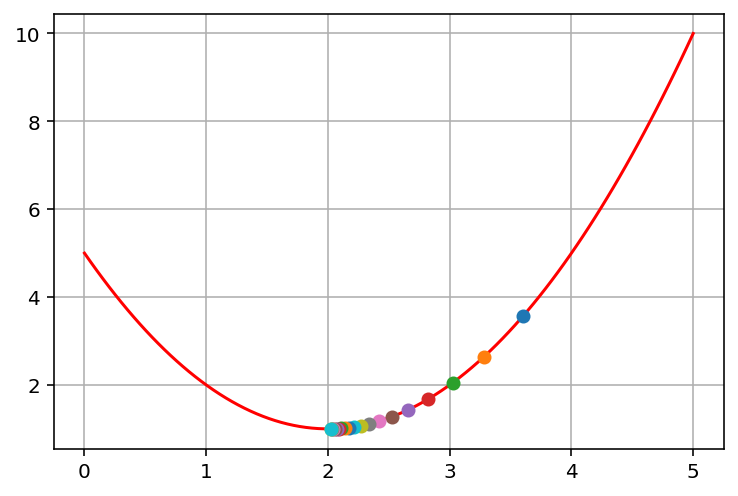

In [17]:
plt.plot(xs, f(xs), 'r')
plt.grid()
grad_desc(f, fp, 4, c=0.1, n=20)

4
-0.40000000000000036
4.880000000000001
-1.4560000000000013
6.147200000000002
-2.976640000000004
7.971968000000007
-5.166361600000008
10.59963392000001
-8.319560704000011
14.383472844800014
-12.86016741376002
19.832200896512024
-19.398641075814435
27.678369290977326
-28.814043149172793
38.97685177900736
-42.37222213480884
55.24666656177061
-61.89599987412474


78.6751998489497

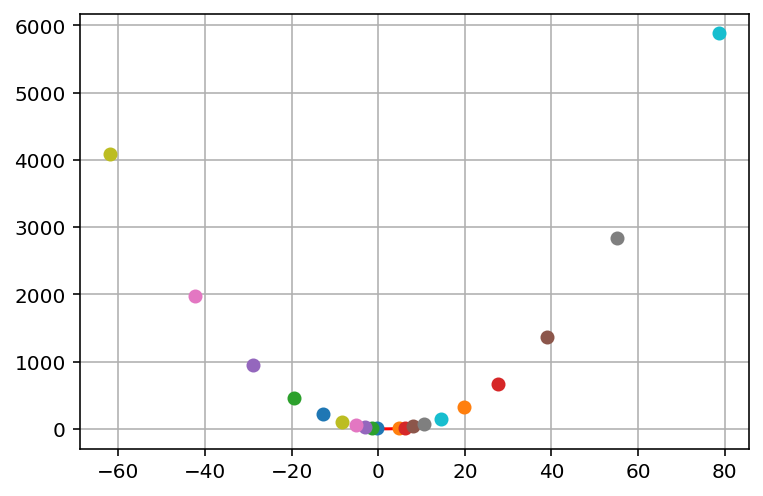

In [20]:
plt.plot(xs, f(xs), 'r')
plt.grid()
grad_desc(f, fp, 4, c=1.1, n=20)

### Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + y^2 + 1$$
Make the 3D plot.

Text(0.5, 0.92, 'f(x,y)')

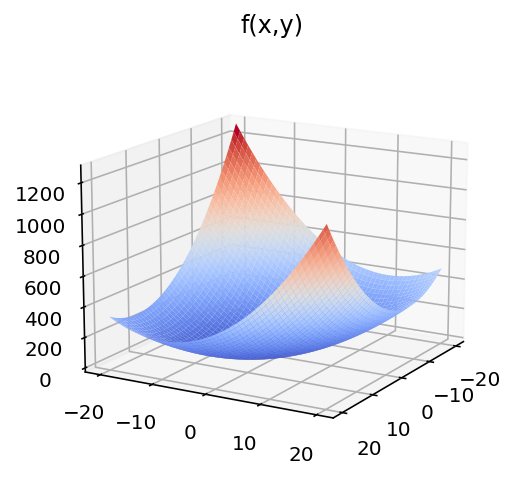

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

Text(0.5, 1.0, 'f(x,y)')

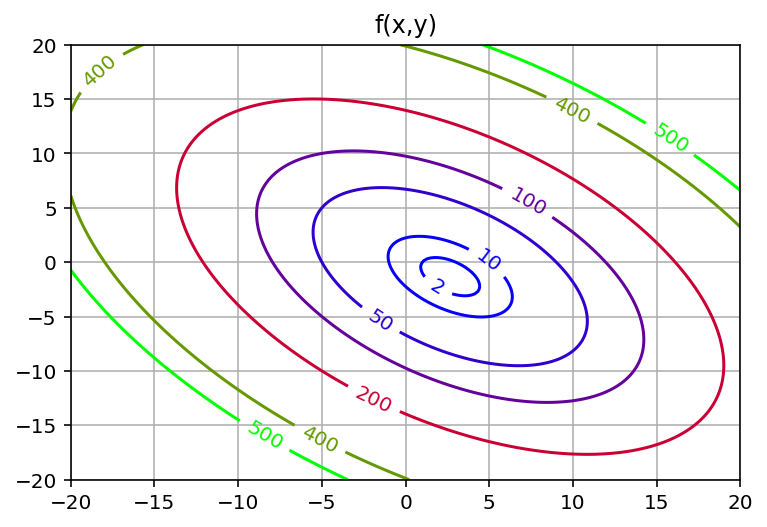

In [22]:
from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

3)Where do you think the minimum is?

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

In [33]:
Vector = np.ndarray
def f(v: Vector):
    x, y = v
    return (x-2)**2+x*y+y**2+1

def gradient(f, v: Vector, h: float)-> Vector:
    """Compute the gradient of f evaluated at v."""
    ret = np.zeros(v.shape)
    for idx in range(len(v)):
        unit_vector = np.zeros(v.shape)
        unit_vector[idx] = 1
        ret[idx] = (f(v+unit_vector*h) - f(v-unit_vector*h))/2/h        
    return ret

def gradient_desc(f, v0, n, c=1e-2, h=1e-3): 
    v = v0.copy()
    for _ in range(n):
        v = v - c*gradient(f, v, h)
    return v



    

[ -4.7 -19.1]
[ -1.85 -14.81]
[ 9.99999997e-04 -1.16630000e+01]
[ 1.1671 -9.3305]
[ 1.86673 -7.58111]
[ 2.251495 -6.251561]
[ 2.4263521 -5.2263983]
[ 2.46372151 -4.42375385]
[ 2.41335259 -3.78537523]
[ 2.3092196  -3.26963544]
[ 2.17433922 -2.84663032]
[ 2.02413441 -2.49473817]
[ 1.86878134 -2.19820398]
[ 1.71484547 -1.94544132]
[ 1.56642051 -1.7278376 ]
[ 1.42592017 -1.53891213]
[ 1.29462735 -1.37372172]
[ 1.17307405 -1.22844011]
[ 1.06130325 -1.1000595 ]
[ 0.95904855 -0.98617792]
[ 0.86585663 -0.88484719]
[ 0.78117003 -0.79446342]
[ 0.70438236 -0.71368774]
[ 0.63487466 -0.64138843]
[ 0.57203857 -0.57659821]
[ 0.51529068 -0.51848242]
[ 0.46408079 -0.46631501]
[ 0.41789613 -0.41946008]
[ 0.37626291 -0.37735768]
[ 0.3387461  -0.33951243]
[ 0.30494812 -0.30548456]
[ 0.27450695 -0.27488246]
[ 0.24709381 -0.24735666]
[ 0.22241071 -0.22259471]
[ 0.20018804 -0.20031684]
[ 0.18018212 -0.18027228]
[ 0.16217292 -0.16223603]
[ 0.14596194 -0.14600612]
[ 0.13137016 -0.13140109]
[ 0.11823624 -0.1182

array([ 2.70789677, -1.37456364])

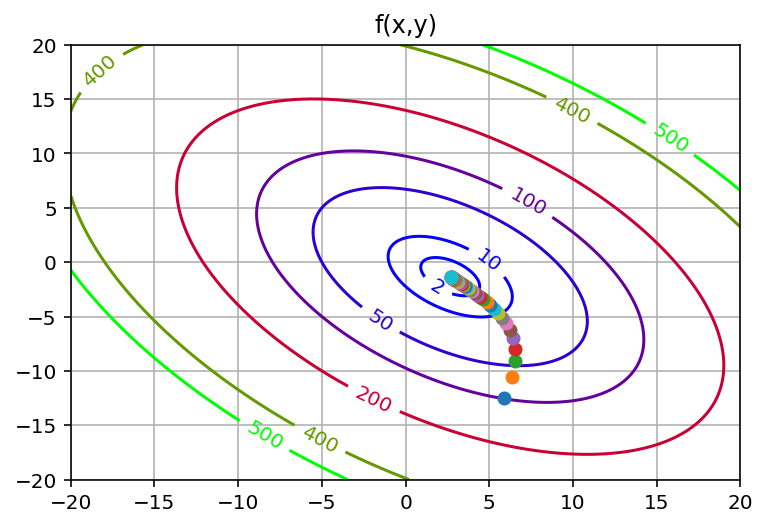

In [41]:
from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f((xx,yy)) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

def gradient_desc(f, v0, n, c=0.1, h=1e-3): 
    v = v0.copy()
    for _ in range(n):
        v = v - c*gradient(f, v, h)
        print(gradient(f, v, h))
        plt.plot(v[0], v[1], 'o')
    return v

gradient_desc(f, np.array([5, -15]), 50)

### Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

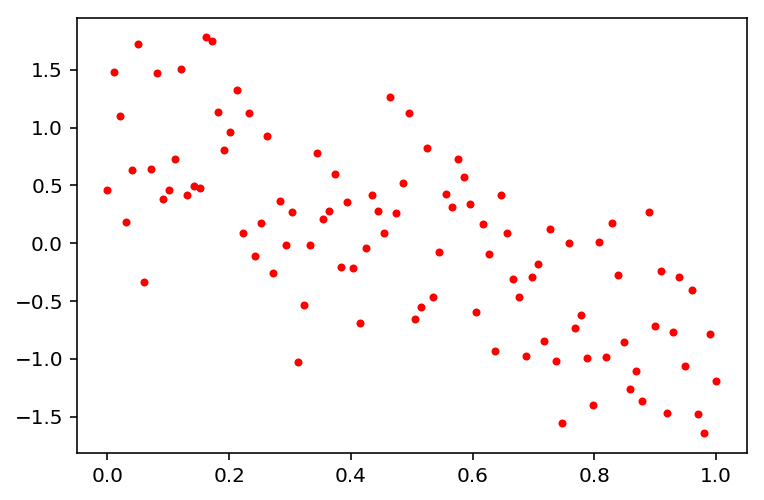

In [5]:
np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(dx,dy,'.r')

1) What exactly are we trying to minimize and why?

2) Minimize and Visualize it.

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [6]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

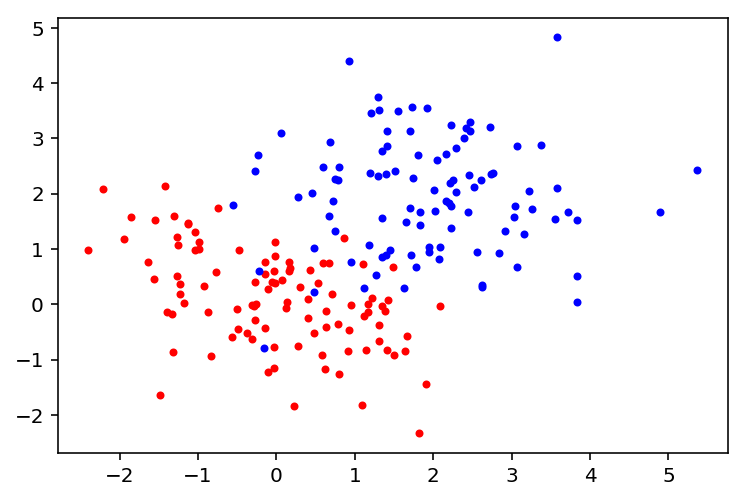

In [7]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?